# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

* Check the shape

In [5]:
df_fatalities.shape, df_hh_income.shape, df_pct_poverty.shape, df_pct_completed_hs.shape, df_share_race_city.shape

((2535, 14), (29322, 3), (29329, 3), (29329, 3), (29268, 7))

* Get the info

In [6]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [7]:
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [8]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [9]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [10]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [11]:
df_fatalities.isna().sum().sort_values(ascending=False)
df_fatalities.fillna(0, inplace=True)

In [12]:
df_hh_income.isna().sum().sort_values(ascending=False)
df_hh_income.fillna(0, inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

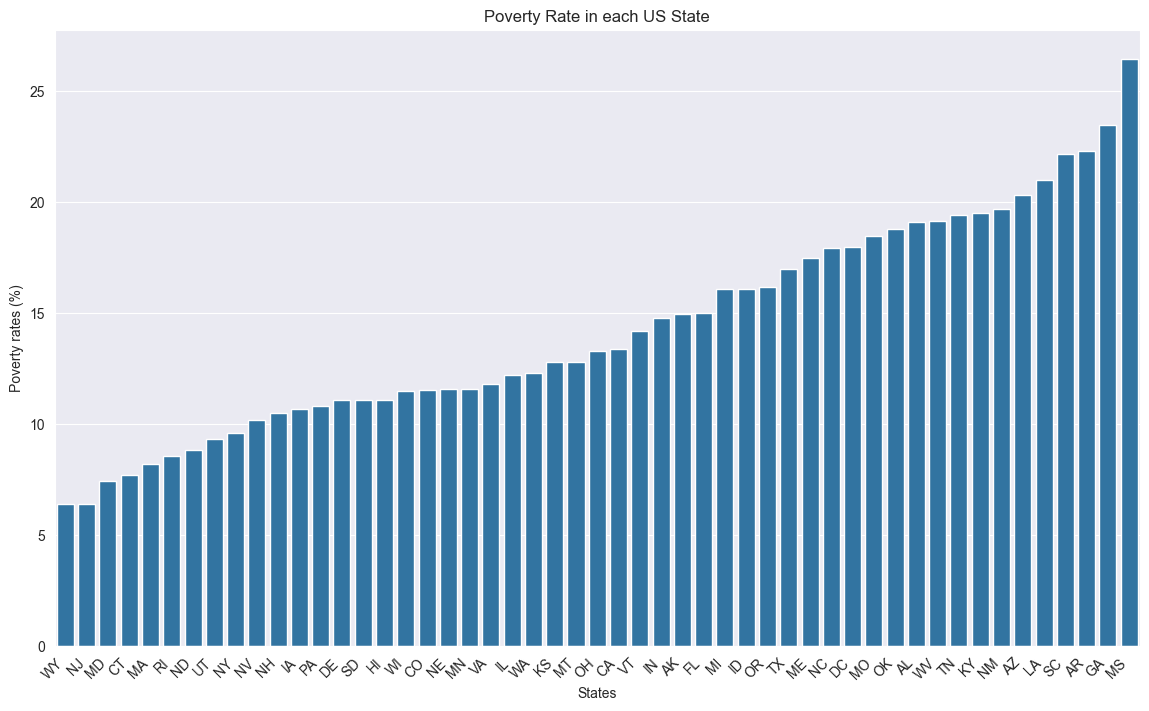

In [13]:
# Get the states and poverty_rates list
states = df_pct_poverty['Geographic Area'].to_list()
# Replace non-numeric values with NaN
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
# Convert the column to float
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].astype(float)
poverty_rates = df_pct_poverty['poverty_rate'].to_list()

# Aggregate data
df = pd.DataFrame(
    {
        'States': states, 
        'Poverty rates (%)': poverty_rates
    }
)
result = df.groupby('States')['Poverty rates (%)'].median()

# Adjust the figure size
plt.figure(figsize=(14, 8)) 

# Plot a bar-plot where bars are ordered by median poverty rates
ax = sns.barplot(x=result.index, y=result, order=result.sort_values().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Set the title for the plot
plt.title('Poverty Rate in each US State')

# Shot the plot
plt.show();

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

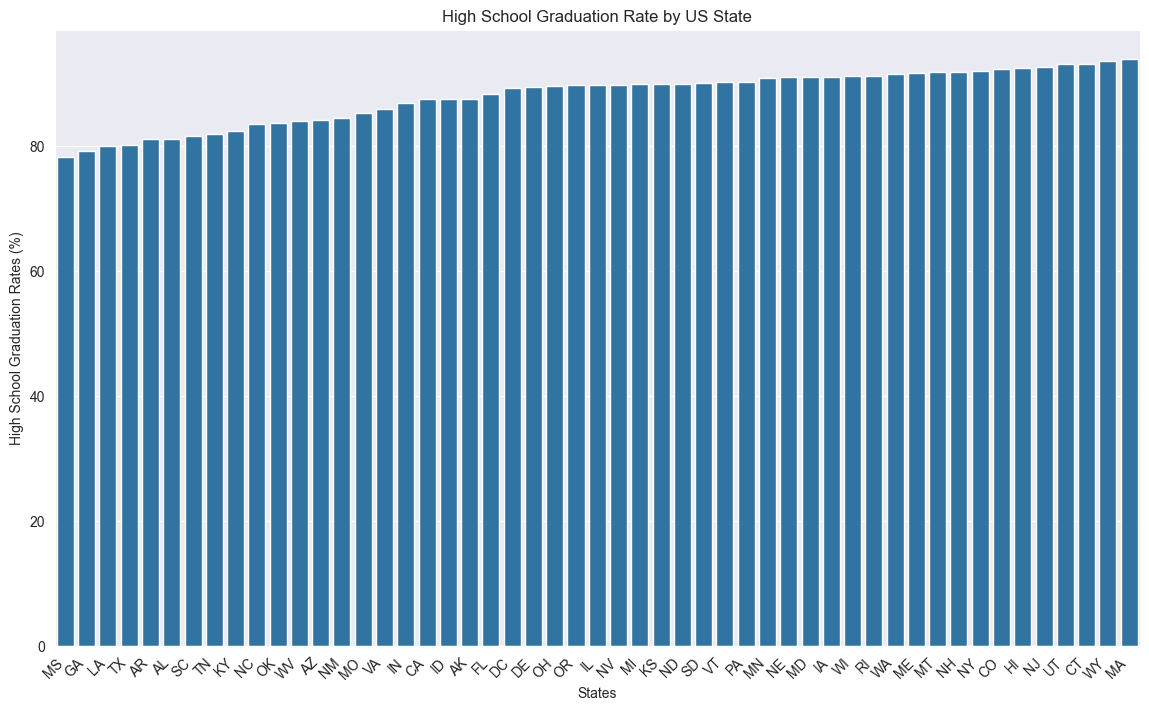

In [14]:
# Get the states and grad_rates list
states = df_pct_completed_hs['Geographic Area'].to_list()
# Replace non-numeric values with NaN
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
# Convert the column to float
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].astype(float)
grad_rates = df_pct_completed_hs['percent_completed_hs'].to_list()

# Aggregate data
df = pd.DataFrame(
    {
        'States': states, 
        'High School Graduation Rates (%)': grad_rates
    }
)
result = df.groupby('States')['High School Graduation Rates (%)'].median()

# Adjust the figure size
plt.figure(figsize=(14, 8)) 

# Plot a bar-plot where bars are ordered by median poverty rates
ax = sns.barplot(x=result.index, y=result, order=result.sort_values().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Set the title for the plot
plt.title('High School Graduation Rate by US State')

# Show the plot
plt.show();

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

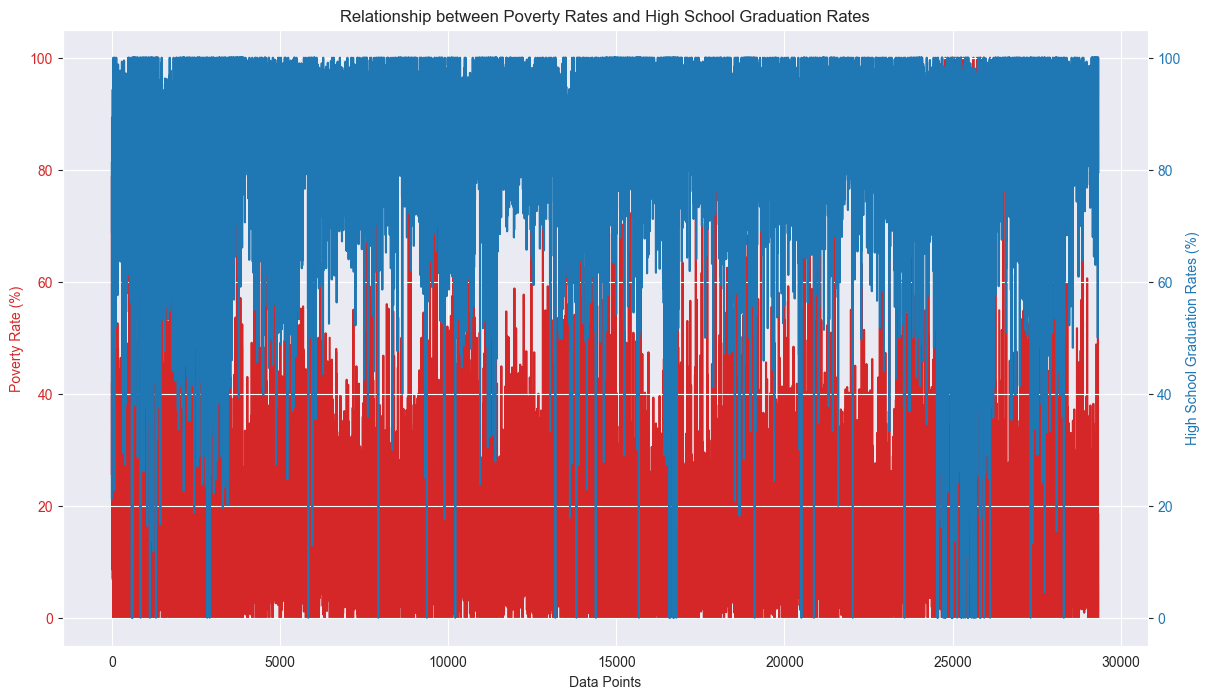

In [15]:
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot poverty rates
color = 'tab:red'
ax1.set_xlabel('Data Points')
ax1.set_ylabel('Poverty Rate (%)', color=color)
ax1.plot(range(1, len(poverty_rates) + 1), poverty_rates, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('High School Graduation Rates (%)', color=color)
ax2.plot(range(1, len(grad_rates) + 1), grad_rates, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and grid
plt.title('Relationship between Poverty Rates and High School Graduation Rates')
plt.grid(True)

# Show the plot
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

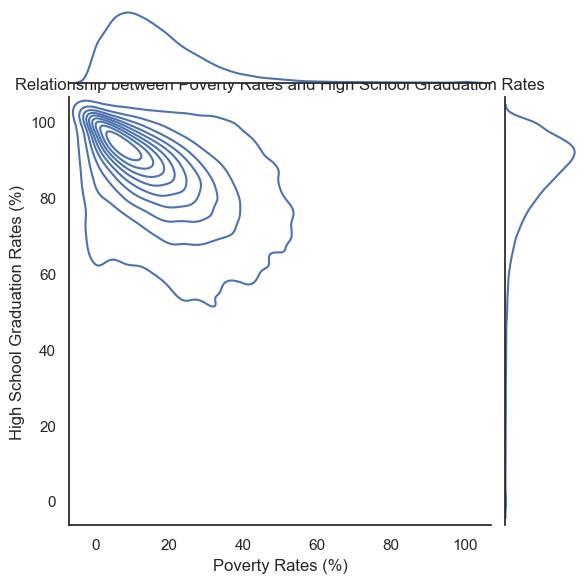

In [16]:
# Create data
data = (
    {
        'Poverty Rates (%)': poverty_rates,
        'High School Graduation Rates (%)': grad_rates
    }
)

# Create a joint plot
sns.set(style='white', color_codes=True)
sns.jointplot(x='Poverty Rates (%)', y='High School Graduation Rates (%)', data=data, kind='kde', color='b')

# Set the title
plt.title('Relationship between Poverty Rates and High School Graduation Rates')

# Show the plot
plt.show();

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

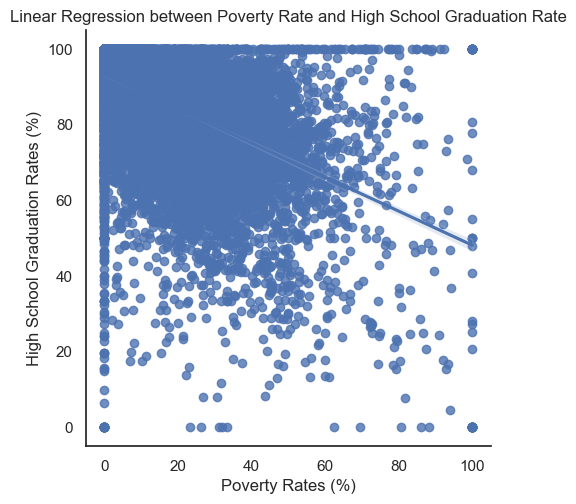

In [17]:
# Create data
data = pd.DataFrame({
    'Poverty Rates (%)': poverty_rates,
    'High School Graduation Rates (%)': grad_rates
})

# Create lmplot
sns.lmplot(x='Poverty Rates (%)', y='High School Graduation Rates (%)', data=data)

# Mark the labels
plt.xlabel('Poverty Rates (%)')
plt.ylabel('High School Graduation Rates (%)')

# Set the title
plt.title('Linear Regression between Poverty Rate and High School Graduation Rate')

# Show the plot
plt.show();


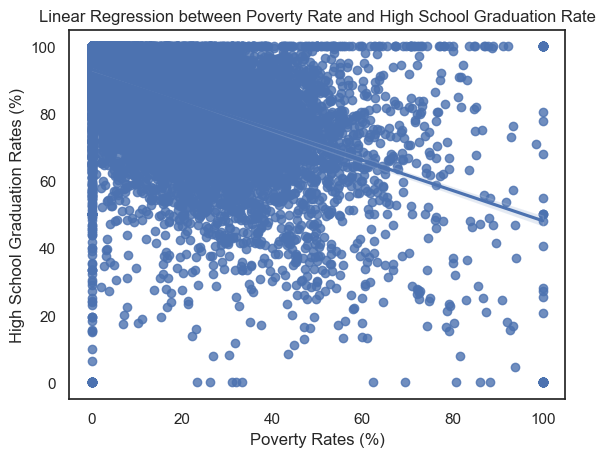

In [18]:
# Create data
data = pd.DataFrame({
    'Poverty Rates (%)': poverty_rates,
    'High School Graduation Rates (%)': grad_rates
})

# Create lmplot
sns.regplot(x='Poverty Rates (%)', y='High School Graduation Rates (%)', data=data)

# Mark the labels
plt.xlabel('Poverty Rates (%)')
plt.ylabel('High School Graduation Rates (%)')

# Set the title
plt.title('Linear Regression between Poverty Rate and High School Graduation Rate')

# Show the plot
plt.show();

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [19]:
# # Feature engineering
# races = [race for race in df_share_race_city if race not in ['Geographic area', 'City']]
# for race in races:
#     # Replace non-numeric values with NaN
#     df_share_race_city[race] = pd.to_numeric(df_share_race_city[race], errors='coerce')
#     df_share_race_city[race] = df_share_race_city[race].astype(float)
    
# # Get the data
# states = df_share_race_city['Geographic area'].to_list()
# white = df_share_race_city['share_white'].to_list()  # Percentage of white population
# black = df_share_race_city['share_black'].to_list()  # Percentage of black population
# hispanic = df_share_race_city['share_hispanic'].to_list()  # Percentage of Hispanic population
# asian = df_share_race_city['share_asian'].to_list()  # Percentage of Asian population
# native_american = df_share_race_city['share_native_american'].to_list()  # Percentage of Native American population

In [20]:
df_racial = df_share_race_city.groupby(['Geographic area'], as_index=False).agg(
    {
        'City':pd.Series.count, 
        'share_hispanic':pd.Series.count, 
        'share_asian': pd.Series.count, 
        'share_native_american':pd.Series.count, 
        'share_white':pd.Series.count, 
        'share_black':pd.Series.count
    }
)
col_subset = ['share_hispanic', 'share_asian', 'share_native_american', 'share_white', 'share_black']
 
plt.figure(figsize=(16, 8), dpi=120)
fig = px.bar(df_racial, x='Geographic area', 
             y=['share_hispanic', 'share_asian', 'share_native_american', 'share_white', 'share_black'], 
             
             hover_name = df_racial['Geographic area'],
             title="Bar Chart with Subsections Showing the Racial Makeup of Each US State")
fig.update_layout(xaxis_title="Geographic area", yaxis_title="Racial Makeup")
fig.show()

<Figure size 1920x960 with 0 Axes>

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [21]:
# Get count of kills wrt the racesx
white = df_fatalities['race'].value_counts().get('W', 0)
black = df_fatalities['race'].value_counts().get('B', 0)
hispanic = df_fatalities['race'].value_counts().get('H', 0)
asian = df_fatalities['race'].value_counts().get('A', 0)
native_american = df_fatalities['race'].value_counts().get('NA', 0)
other = df_fatalities['race'].value_counts().get('O', 0)

In [22]:
race_labels = ['White', 'Black', 'Hispanic', 'Asian', 'Native American', 'Other']
kill_counts = [white, black, hispanic, asian, native_american, other]  # Number of people killed for each race

# Create donut chart
fig = px.pie(names=race_labels, values=kill_counts, hole=0.5, title='Percentage of People Killed by Race')
fig.update_traces(textinfo='percent+label')
fig.update_layout(height=700, width=1100)
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [23]:
# Get count of kills wrt the gender
men = df_fatalities['gender'].value_counts().get('M', 0)
women = df_fatalities['gender'].value_counts().get('F', 0)

In [24]:
gender = ['Men', 'Women']
kill_counts = [men, women]  # Number of people killed for each race

# Create donut chart
fig = px.pie(names=gender, values=kill_counts, hole=0.5, title='Number of People Killed by Gender')
fig.update_traces(textinfo='value+label')
fig.update_layout(height=700, width=1100)
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [25]:
# Get the unique values in 'manner of deaths'
df_fatalities['manner_of_death'].unique()

array(['shot', 'shot and Tasered'], dtype=object)

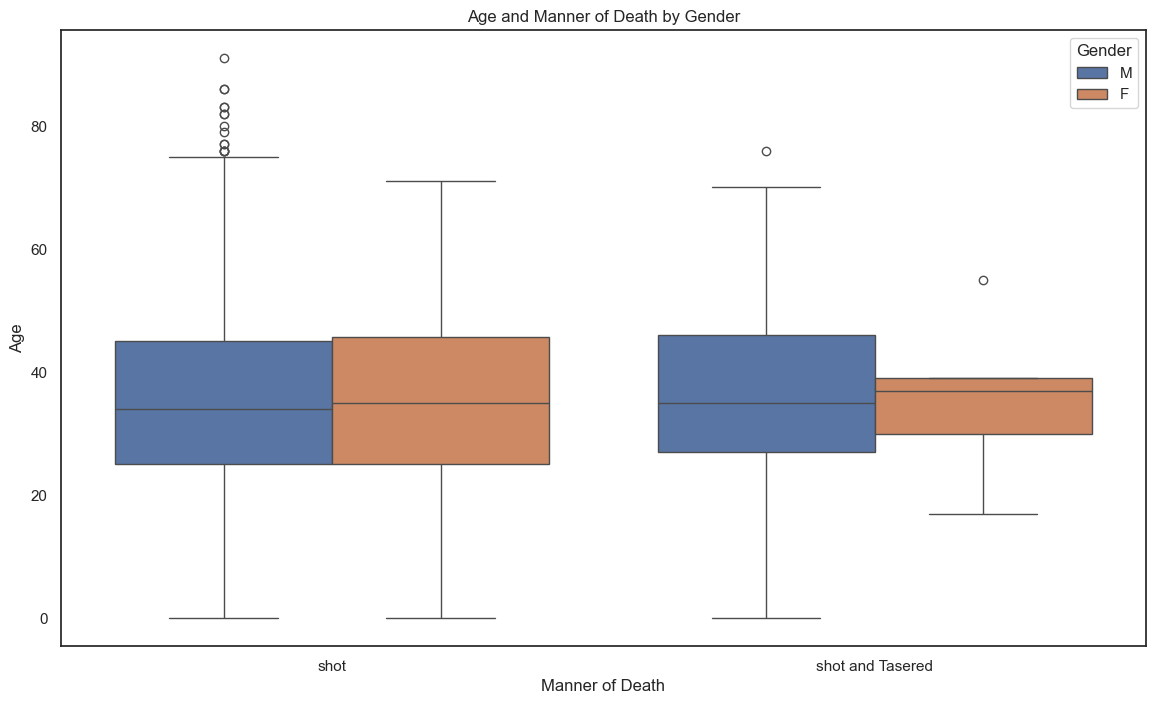

In [26]:
# Filter data for non-null age and manner of death
df_filtered = df_fatalities.dropna(subset=['age', 'manner_of_death'])

# Create box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='manner_of_death', y='age', hue='gender', data=df_filtered)
plt.title('Age and Manner of Death by Gender')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [27]:
# Types of weapons
types = df_fatalities['armed'].to_list()
types

['gun',
 'gun',
 'unarmed',
 'toy weapon',
 'nail gun',
 'gun',
 'gun',
 'gun',
 'unarmed',
 'toy weapon',
 'knife',
 'gun',
 'knife',
 'gun',
 'gun',
 'vehicle',
 'shovel',
 'unarmed',
 'gun',
 'gun',
 'gun',
 'gun',
 'gun',
 'gun',
 'gun',
 'knife',
 'vehicle',
 'vehicle',
 'gun',
 'knife',
 'gun',
 'knife',
 'gun',
 'gun',
 'gun',
 'knife',
 'gun',
 'gun',
 'knife',
 'gun',
 'gun',
 'knife',
 'gun',
 'gun',
 'knife',
 'vehicle',
 'gun',
 'gun',
 'gun',
 'gun',
 'toy weapon',
 'knife',
 'gun',
 'vehicle',
 'knife',
 'gun',
 'gun',
 'knife',
 'gun',
 'gun',
 'vehicle',
 'gun',
 'unarmed',
 'knife',
 'vehicle',
 'gun',
 'gun',
 'knife',
 'gun',
 'hammer',
 'gun',
 'unarmed',
 'gun',
 'gun',
 'gun',
 'knife',
 'gun',
 'unarmed',
 'gun',
 'gun',
 'gun',
 'knife',
 'gun',
 'unarmed',
 'gun',
 'gun',
 'unarmed',
 'gun',
 'knife',
 'gun',
 'gun',
 'toy weapon',
 'gun',
 'gun',
 'gun',
 'gun',
 'gun',
 'gun',
 'gun',
 'gun',
 'unarmed',
 'gun',
 'gun',
 'knife',
 'toy weapon',
 'vehicle',
 '

In [28]:
# Dictionary to store weapon : people killed with this weapon
weapons_and_counts = {weapon:df_fatalities['armed'].value_counts().get(weapon, 0) for weapon in types}

In [29]:
# List to store weapon names and kill counts
weapons = []
kill_counts = []

# Loop through weapons_and_counts and fill weapons and kill_counts
for weapon in weapons_and_counts:
    weapons.append(weapon)
    kill_counts.append(weapons_and_counts[weapon])

# Create histogram
fig = px.histogram(x=weapons, y=kill_counts, labels={'x': 'Weapon', 'y': 'Kill Counts'}, title='Number of People Killed by Different Weapons')
fig.update_traces(marker_color='skyblue', marker_line_color='black', marker_line_width=1)
fig.update_layout(bargap=0.2, height=800, width=1100)
fig.show()

In [30]:
# Create armed and unarmed count variables
armed = 0
unarmed = 0
for weapon in weapons_and_counts:
    if weapon == 'unarmed':
        unarmed += weapons_and_counts[weapon]
    else:
        armed += weapons_and_counts[weapon]

In [31]:
weapon_kind = ['Armed', 'Unarmed']
kill_counts = [armed, unarmed]  

# Create donut chart
fig = px.pie(names=weapon_kind, values=kill_counts, hole=0.5, title='Percentage of People Killed by the Kind of Weapon')
fig.update_traces(textinfo='percent+label')
fig.update_layout(height=700, width=1100)
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [32]:
# Get all the ages
ages = df_fatalities['age'].astype(int).to_list()
ages

[53,
 47,
 23,
 32,
 39,
 18,
 22,
 35,
 34,
 47,
 25,
 31,
 41,
 30,
 37,
 28,
 42,
 36,
 49,
 71,
 33,
 39,
 23,
 29,
 34,
 43,
 24,
 29,
 34,
 75,
 68,
 34,
 27,
 39,
 24,
 36,
 33,
 41,
 48,
 21,
 24,
 27,
 32,
 67,
 49,
 42,
 36,
 36,
 19,
 54,
 25,
 17,
 61,
 29,
 56,
 40,
 45,
 26,
 26,
 59,
 17,
 68,
 24,
 34,
 26,
 29,
 33,
 39,
 45,
 35,
 26,
 42,
 31,
 48,
 31,
 54,
 17,
 59,
 42,
 23,
 38,
 29,
 45,
 28,
 37,
 28,
 28,
 51,
 36,
 59,
 25,
 26,
 74,
 33,
 27,
 57,
 46,
 41,
 61,
 45,
 35,
 49,
 45,
 23,
 46,
 23,
 21,
 35,
 27,
 37,
 16,
 51,
 25,
 34,
 34,
 56,
 26,
 24,
 43,
 31,
 32,
 30,
 50,
 20,
 0,
 31,
 38,
 77,
 41,
 51,
 50,
 42,
 39,
 47,
 37,
 41,
 16,
 30,
 27,
 43,
 31,
 42,
 21,
 49,
 34,
 27,
 24,
 17,
 34,
 28,
 28,
 40,
 37,
 49,
 43,
 35,
 20,
 25,
 25,
 26,
 28,
 45,
 36,
 34,
 37,
 48,
 19,
 29,
 40,
 35,
 43,
 58,
 46,
 30,
 27,
 31,
 23,
 37,
 64,
 31,
 39,
 31,
 25,
 54,
 53,
 37,
 35,
 59,
 36,
 32,
 41,
 29,
 53,
 26,
 27,
 28,
 52,
 20,
 22,
 49,
 

In [33]:
# Get count of people under age 25 and people with age 25 and above
under_25 = 0
_25_and_above = 0
for age in ages:
    if age < 25:
        under_25 += 1
    else:
        _25_and_above += 1 

In [34]:
age_range = ['Under 25', '25 and Above']
kill_counts = [under_25, _25_and_above]  

# Create donut chart
fig = px.pie(names=age_range, values=kill_counts, hole=0.5, title='Percentage of People Killed by the Age Range')
fig.update_traces(textinfo='percent+label')
fig.update_layout(height=700, width=1100)
fig.show()

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

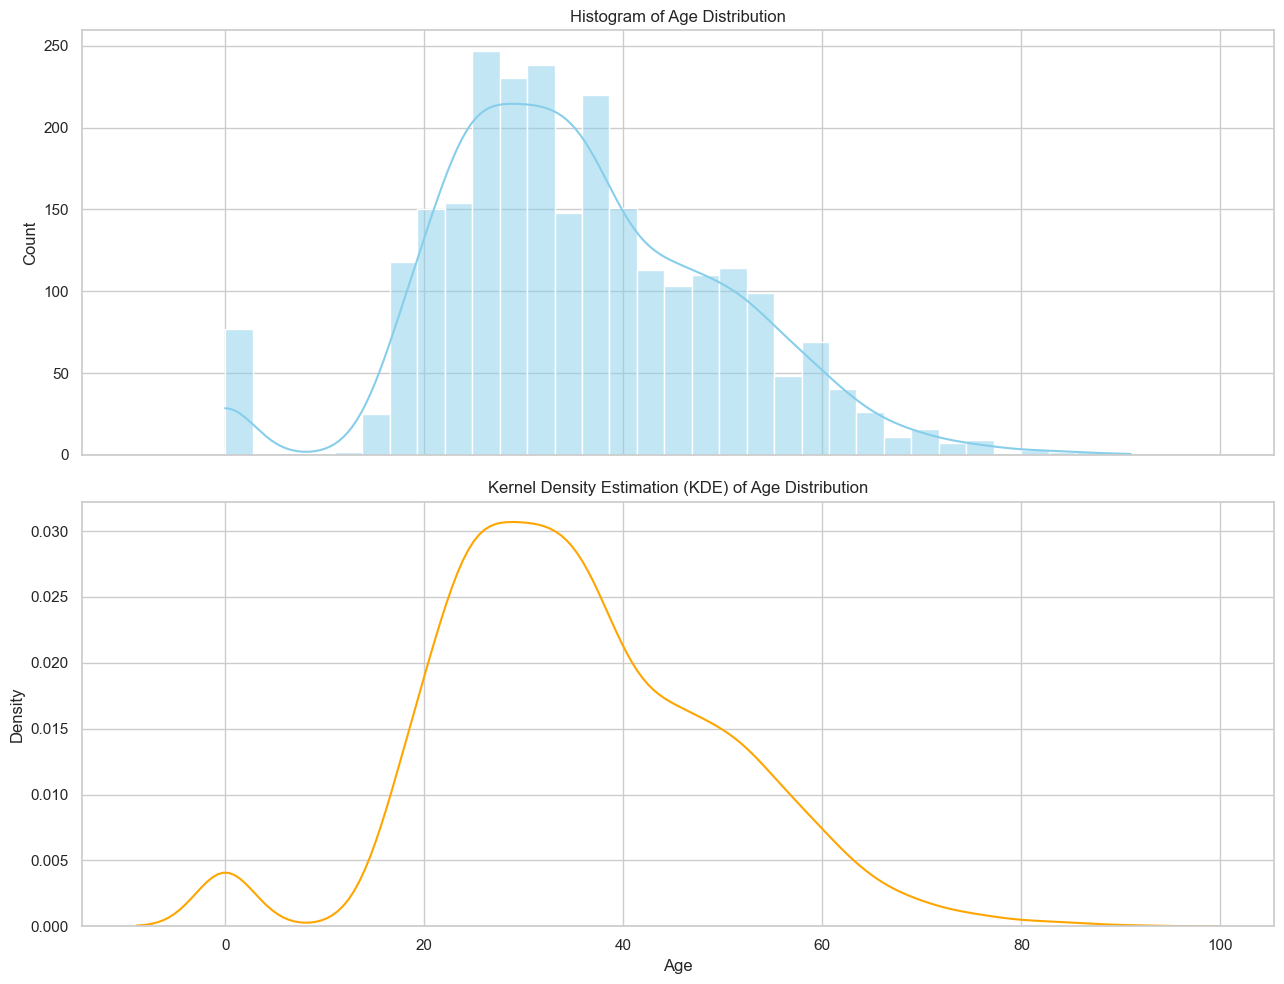

In [35]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(13, 10), sharex=True)

# Plot the histogram
sns.histplot(df_fatalities['age'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram of Age Distribution')

# Plot the KDE plot
sns.kdeplot(data=df_fatalities['age'], color='orange', ax=axes[1])
axes[1].set_title('Kernel Density Estimation (KDE) of Age Distribution')

# Add labels and adjust layout
plt.xlabel('Age')
plt.tight_layout()

# Show the plot
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

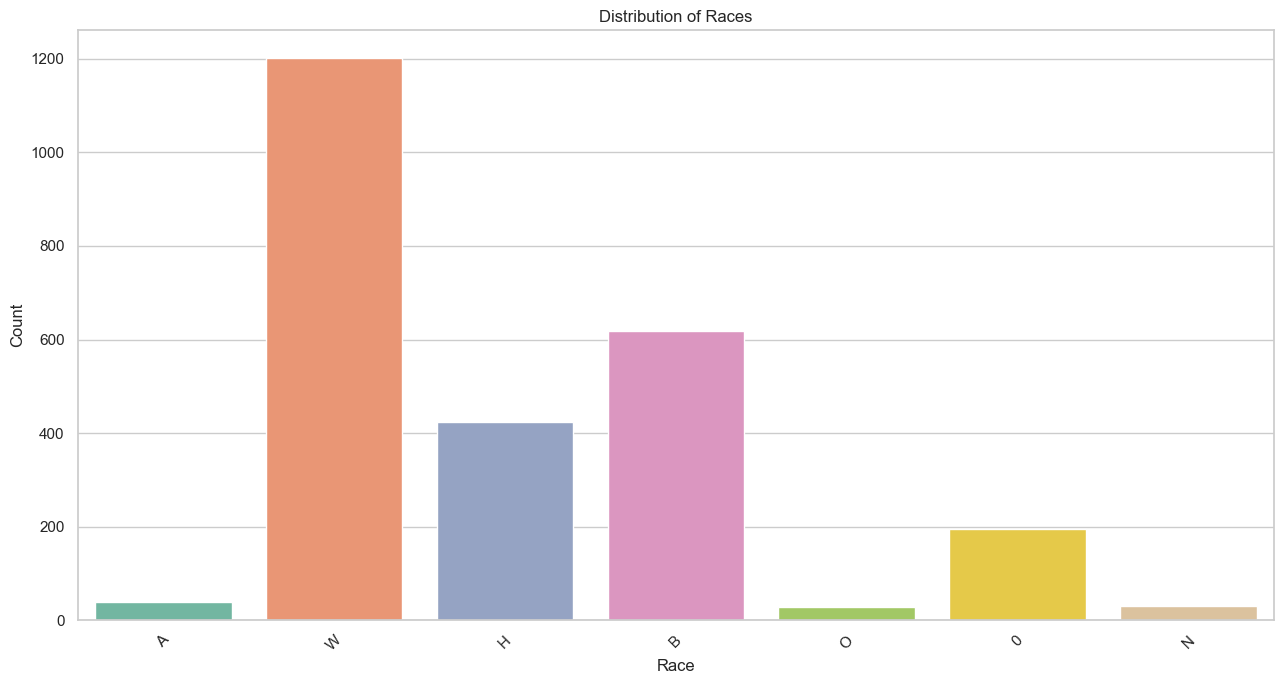

In [36]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a figure with a single subplot
plt.figure(figsize=(13, 7))

# Plot the count of each race
sns.countplot(data=df_fatalities, x='race', palette='Set2')

# Add labels and adjust layout
plt.title('Distribution of Races')
plt.xlabel('Race')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [37]:
race_labels = ['White', 'Black', 'Hispanic', 'Asian', 'Native American', 'Other']
kill_counts = [white, black, hispanic, asian, native_american, other]  # Number of people killed for each race

# Create donut chart
fig = px.pie(names=race_labels, values=kill_counts, hole=0.5, title='Number of People Killed by Race')
fig.update_traces(textinfo='value+label')
fig.update_layout(height=700, width=1100)
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [38]:
# Get list containing true or false value for mental illness presence
metal_illness = df_fatalities['signs_of_mental_illness'].to_list()
metal_illness

[True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 Fal

In [39]:
# Variables to store number of people with and without mental illness
have_mental_illness = 0
not_have_mental_illness = 0
for illness in metal_illness:
    if illness:
        have_mental_illness += 1
    else:
        not_have_mental_illness += 1

In [40]:
signs_of_mental_illness = ['Have mental illness', 'Do not have mental illness']
kill_counts = [have_mental_illness, not_have_mental_illness]  

# Create donut chart
fig = px.pie(names=signs_of_mental_illness, values=kill_counts, hole=0.5, title='Percentage of People Killed who were diagnosed with a Mental Illness')
fig.update_traces(textinfo='percent+label')
fig.update_layout(height=700, width=1100)
fig.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

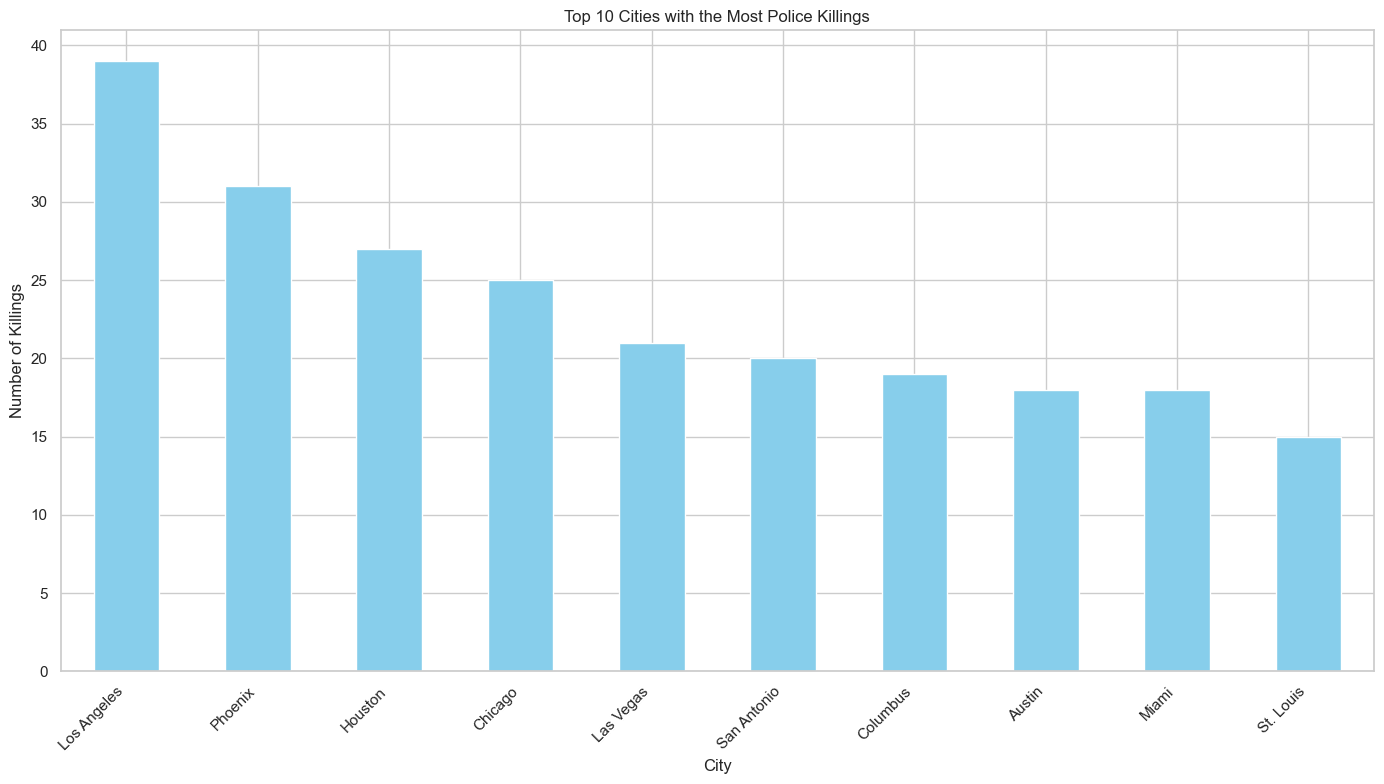

In [41]:
# Group by city and count the number of killings
city_killings = df_fatalities['city'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(14, 8))
city_killings.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities with the Most Police Killings')
plt.xlabel('City')
plt.ylabel('Number of Killings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [42]:
# Filter the data for the top 10 cities with the most police killings
top_10_cities = df_fatalities['city'].value_counts().head(10).index
df_top_10 = df_fatalities[df_fatalities['city'].isin(top_10_cities)]

# Calculate the share of each race in each city
race_share_by_city = df_top_10.groupby(['city', 'race']).size().unstack().div(df_top_10.groupby('city').size(), axis=0)

# Print the share of each race in the top 10 cities
print("Share of each race in the top 10 cities:")
print(race_share_by_city)

# Calculate the rate at which people are killed by race for each city
race_kill_rate_by_city = df_top_10.groupby(['city', 'race']).size().unstack().div(df_top_10['city'].value_counts(), axis=0)

# Print the rate at which people are killed by race for each city
print("\nRate at which people are killed by race for each city:")
print(race_kill_rate_by_city)

Share of each race in the top 10 cities:
race           0    A    B    H    N    O    W
city                                          
Austin       NaN  NaN 0.17 0.11  NaN  NaN 0.72
Chicago     0.04  NaN 0.84 0.04  NaN  NaN 0.08
Columbus    0.05  NaN 0.58  NaN  NaN 0.05 0.32
Houston     0.04 0.04 0.56 0.22 0.04  NaN 0.11
Las Vegas   0.19  NaN 0.14 0.24  NaN  NaN 0.43
Los Angeles 0.08 0.03 0.26 0.49  NaN  NaN 0.15
Miami       0.06  NaN 0.44 0.33  NaN  NaN 0.17
Phoenix     0.10  NaN 0.06 0.35 0.10  NaN 0.39
San Antonio 0.10  NaN 0.15 0.60  NaN  NaN 0.15
St. Louis   0.07  NaN 0.73  NaN  NaN  NaN 0.20

Rate at which people are killed by race for each city:
race           0    A    B    H    N    O    W
city                                          
Austin       NaN  NaN 0.17 0.11  NaN  NaN 0.72
Chicago     0.04  NaN 0.84 0.04  NaN  NaN 0.08
Columbus    0.05  NaN 0.58  NaN  NaN 0.05 0.32
Houston     0.04 0.04 0.56 0.22 0.04  NaN 0.11
Las Vegas   0.19  NaN 0.14 0.24  NaN  NaN 0.43
Los Angele

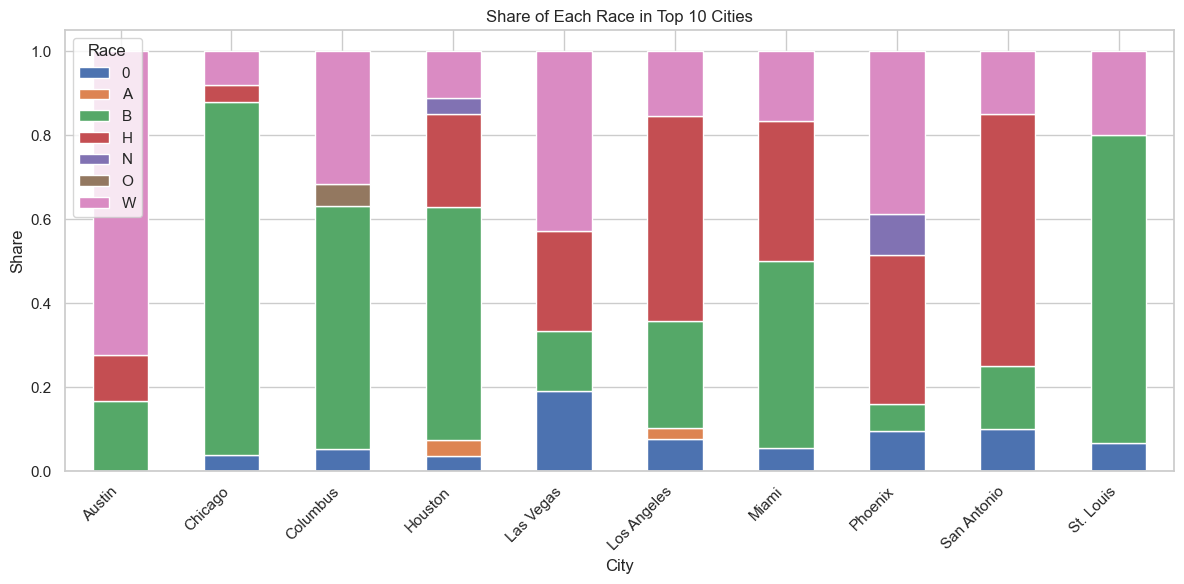

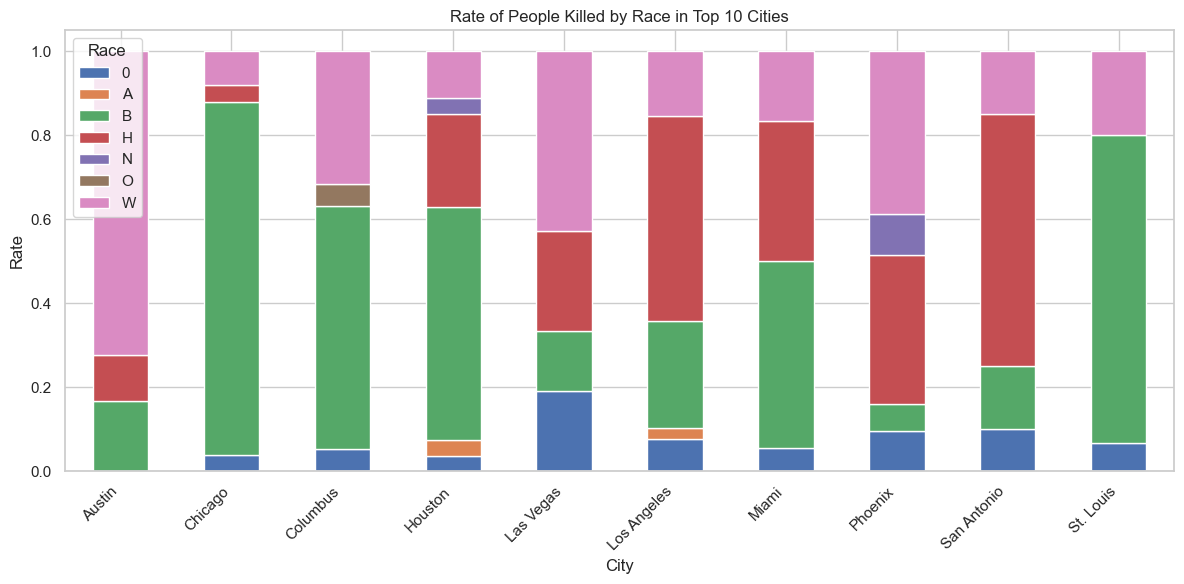

In [43]:
# Plot the share of each race in the top 10 cities
race_share_by_city.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Share of Each Race in Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Share')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Race')
plt.tight_layout()
plt.show()

# Plot the rate at which people are killed by race for each city
race_kill_rate_by_city.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Rate of People Killed by Race in Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Rate')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Race')
plt.tight_layout()
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [44]:
deaths_by_state = df_fatalities.groupby('state')['id'].count().reset_index(name='count')
fig = px.choropleth(deaths_by_state, locations='state', color='count', locationmode="USA-states", scope="usa", title='Police Killings by US State', color_continuous_scale='Reds')
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [45]:
# # Convert the 'date' column to datetime format
# df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

# # Group the data by year and count the number of killings in each year
# killings_over_time = df_fatalities.groupby(df_fatalities['date'].dt.year)['id'].count()

# # Plot the data
# plt.figure(figsize=(14, 8))
# plt.plot(killings_over_time.index, killings_over_time.values, marker='o', linestyle='-')
# plt.title('Number of Police Killings Over Time')
# plt.xlabel('Year')
# plt.ylabel('Number of Killings')
# plt.grid(True)
# plt.show()

In [46]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

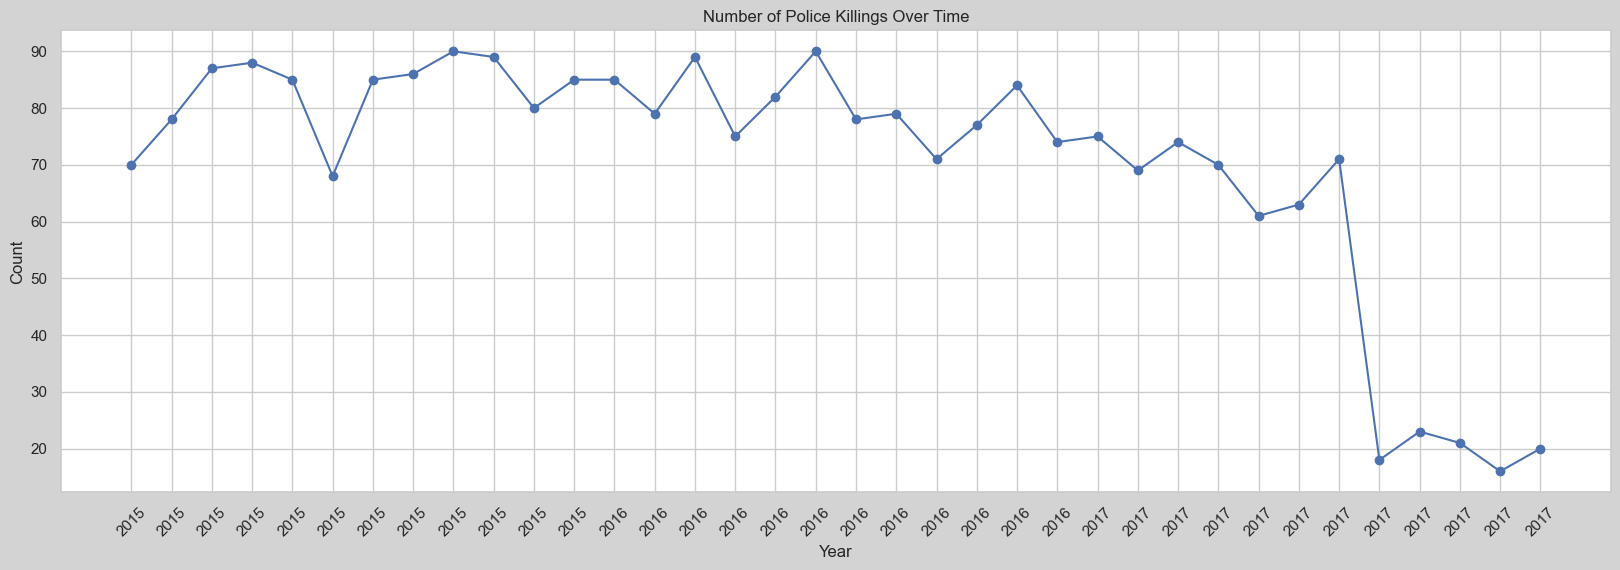

In [47]:
deaths_over_time = df_fatalities.groupby('date').size().reset_index(name='count').sort_values('date')
deaths_over_time['year'] = deaths_over_time['date'].dt.year
deaths_over_time['month'] = deaths_over_time['date'].dt.month
deaths_over_time = deaths_over_time.groupby(['year', 'month'])['count'].sum().reset_index()
plt.figure(figsize=(20, 6), facecolor='lightgray')

plt.plot(deaths_over_time.index, deaths_over_time['count'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Police Killings Over Time')

plt.xticks(deaths_over_time.index, deaths_over_time.year, rotation=45)

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).